In [45]:
import pandas as pd
df = pd.read_excel('Dataset (2).xlsx')


In [46]:
# Filter out 'unknown' race instances
df = df[~df['Race'].isin(['Unknown'])]
del df['Gender']
print(df)

                     Age       Race  CatsInHouse  \
0       Less than 1 year     Birman            3   
1       Less than 1 year     Birman            1   
2             2-10 years   European            4   
3       Less than 1 year   European            1   
4              1-2 years     Birman            2   
...                  ...        ...          ...   
3138          2-10 years    Persian            1   
3139    Less than 1 year  MaineCoon            3   
3140  More than 10 years      Other            1   
3141    Less than 1 year     Bengal            1   
3142    Less than 1 year     Bengal            5   

                            HousingType       Zone  TimeOutside  \
0             Apartment without balcony      Urban            0   
1     Apartment with balcony or terrace      Urban            0   
2                House in a subdivision      Urban            0   
3                House in a subdivision      Rural            2   
4                 Individual house zone 

In [47]:
# Calculate the mean of numeric values
numeric_mask = df['NaturalAreasAbundance'] != 'Unknown'
mean_value = pd.to_numeric(df[numeric_mask]['NaturalAreasAbundance']).mean()

# Replace 'Unknown' with the mean value and round to nearest integer
df['NaturalAreasAbundance'] = df['NaturalAreasAbundance'].replace('Unknown', mean_value)
df['NaturalAreasAbundance'] = df['NaturalAreasAbundance'].astype(float).round().astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3063 entries, 0 to 3142
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    3063 non-null   object
 1   Race                   3063 non-null   object
 2   CatsInHouse            3063 non-null   int64 
 3   HousingType            3063 non-null   object
 4   Zone                   3063 non-null   object
 5   TimeOutside            3063 non-null   int64 
 6   TimeWithOwner          3063 non-null   int64 
 7   Shy                    3063 non-null   int64 
 8   Calm                   3063 non-null   int64 
 9   Skittish               3063 non-null   int64 
 10  Intelligent            3063 non-null   int64 
 11  Vigilant               3063 non-null   int64 
 12  Tenacious              3063 non-null   int64 
 13  Affectionate           3063 non-null   int64 
 14  Friendly               3063 non-null   int64 
 15  Loner                  306

In [48]:
import pandas as pd

def transform_dataset(df):
    """
    Transform the dataset by:
    1. Mapping age values to numeric
    2. One-hot encoding HousingType, Zone, and Race
    
    Args:
    df (pandas.DataFrame): Input DataFrame
    
    Returns:
    pandas.DataFrame: Transformed DataFrame
    """
    # Create a copy of the DataFrame
    df_transformed = df.copy()
    
    # Age mapping
    age_mapping = {
        'Less than 1 year': 0.5,
        '1-2 years': 1.5,
        '2-10 years': 6,
        'More than 10 years': 12
    }
    
    # Apply age mapping
    df_transformed['Age'] = df_transformed['Age'].map(age_mapping)
    
    # One-hot encode categorical variables
    categorical_columns = ['HousingType', 'Zone', 'Race']
    
    # Create one-hot encoded columns
    for column in categorical_columns:
        one_hot = pd.get_dummies(df_transformed[column], prefix=column)
        
        # Add one-hot encoded columns to the transformed DataFrame
        df_transformed = pd.concat([df_transformed, one_hot], axis=1)
        
        # Drop the original categorical column
        df_transformed = df_transformed.drop(column, axis=1)
    
    return df_transformed

# Example usage:
df = transform_dataset(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3063 entries, 0 to 3142
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            3063 non-null   float64
 1   CatsInHouse                                    3063 non-null   int64  
 2   TimeOutside                                    3063 non-null   int64  
 3   TimeWithOwner                                  3063 non-null   int64  
 4   Shy                                            3063 non-null   int64  
 5   Calm                                           3063 non-null   int64  
 6   Skittish                                       3063 non-null   int64  
 7   Intelligent                                    3063 non-null   int64  
 8   Vigilant                                       3063 non-null   int64  
 9   Tenacious                                      3063 non-n

In [59]:
df


,Age,CatsInHouse,TimeOutside,TimeWithOwner,Shy,Calm,Skittish,Intelligent,Vigilant,Tenacious,...,Race_Other,Race_Persian,Race_Ragdoll,Race_Savannah,Race_Siamese,Race_Sphynx,Race_TurkishAngora,FlatFace,LimpWhenHeld,Hairless
1930,1.5,1,0,2,3,4,3,5,5,5,...,False,False,True,False,False,False,False,False,True,False
3547,6.0,4,0,2,1,4,1,3,4,3,...,False,False,False,False,False,False,False,False,False,False
339,6.0,1,0,2,4,2,1,4,4,4,...,False,False,False,False,False,False,False,False,False,False
2450,6.0,5,2,2,2,4,2,4,4,4,...,False,False,False,False,False,False,False,False,False,False
3774,6.0,1,1,3,4,5,3,5,5,5,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,6.0,3,0,2,2,5,1,5,3,2,...,False,False,True,False,False,False,False,False,True,False
2063,6.0,5,0,3,3,4,1,5,5,5,...,False,False,True,False,False,False,False,False,True,False
2609,12.0,2,0,2,4,5,2,4,5,5,...,False,False,False,False,False,False,False,False,False,False
1516,0.5,1,1,2,1,1,3,5,5,5,...,False,False,False,False,False,False,False,False,False,False


In [50]:
import pandas as pd
import numpy as np

def remove_race_outliers(df, numerical_cols=None):
    """
    Remove extreme outliers from numerical columns for each cat race using percentiles.
    Keeps 95% of the data for each race (removes 2.5% from each tail).
    
    Parameters:
    df: pandas DataFrame containing the cat data
    numerical_cols: list of numerical columns to check for outliers. If None, will use all float/int columns
    
    Returns:
    DataFrame with extreme outliers removed, and dictionary containing removal statistics
    """
    if numerical_cols is None:
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Get all race columns
    race_cols = [col for col in df.columns if col.startswith('Race_')]
    
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Dictionary to store statistics
    stats = {
        'total_initial_rows': len(df),
        'removed_by_race': {},
        'removed_rows': set()
    }
    
    # Process each race separately
    for race in race_cols:
        race_mask = df[race] == True
        race_data = df[race_mask]
        
        if len(race_data) == 0:
            continue
            
        stats['removed_by_race'][race] = {
            'initial_count': len(race_data),
            'removed_count': 0,
            'removed_by_column': {}
        }
        
        # Process each numerical column
        for col in numerical_cols:
            # Calculate percentile bounds (2.5th and 97.5th percentiles)
            lower_bound = race_data[col].quantile(0.025)
            upper_bound = race_data[col].quantile(0.975)
            
            # Find outliers
            outliers_mask = (race_data[col] < lower_bound) | (race_data[col] > upper_bound)
            outlier_indices = race_data[outliers_mask].index
            
            # Track removed rows
            stats['removed_rows'].update(outlier_indices)
            
            # Track statistics
            removed_count = len(outlier_indices)
            if removed_count > 0:
                stats['removed_by_race'][race]['removed_by_column'][col] = {
                    'count': removed_count,
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound,
                    'percentage_removed': (removed_count / len(race_data)) * 100
                }
                stats['removed_by_race'][race]['removed_count'] += removed_count
    
    # Remove all identified outliers
    df_clean = df_clean.drop(index=list(stats['removed_rows']))
    
    # Update final statistics
    stats['total_removed_rows'] = len(stats['removed_rows'])
    stats['final_row_count'] = len(df_clean)
    
    return df_clean, stats

# Example usage
numerical_columns = [
    'Age', 'TimeOutside', 'TimeWithOwner', 'CatsInHouse',
    'Shy', 'Calm', 'Skittish', 'Intelligent', 'Vigilant',
    'Tenacious', 'Affectionate', 'Friendly', 'Loner',
    'Ferocious', 'Territorial', 'Aggressive', 'Impulsive',
    'Predictable', 'Inattentive'
]

# Clean the data
df, removal_stats = remove_race_outliers(df, numerical_columns)

# Print summary statistics
print(f"Initial number of rows: {removal_stats['total_initial_rows']}")
print(f"Total rows removed: {removal_stats['total_removed_rows']}")
print(f"Final number of rows: {removal_stats['final_row_count']}")
print("\nBreakdown by race:")
for race, stats in removal_stats['removed_by_race'].items():
    if stats['removed_count'] > 0:
        print(f"\n{race}:")
        print(f"Initial count: {stats['initial_count']}")
        print(f"Removed: {stats['removed_count']}")
        print("Removed by column:")
        for col, col_stats in stats['removed_by_column'].items():
            print(f"  {col}: {col_stats['count']} rows ({col_stats['percentage_removed']:.1f}%)")
            print(f"    Bounds: {col_stats['lower_bound']:.2f} to {col_stats['upper_bound']:.2f}")

Initial number of rows: 3063
Total rows removed: 224
Final number of rows: 2839

Breakdown by race:

Race_Bengal:
Initial count: 239
Removed: 18
Removed by column:
  Age: 6 rows (2.5%)
    Bounds: 0.50 to 6.30
  Intelligent: 2 rows (0.8%)
    Bounds: 2.00 to 5.00
  Tenacious: 6 rows (2.5%)
    Bounds: 1.95 to 5.00
  Ferocious: 4 rows (1.7%)
    Bounds: 1.00 to 4.00

Race_Birman:
Initial count: 192
Removed: 24
Removed by column:
  TimeOutside: 5 rows (2.6%)
    Bounds: 0.00 to 2.22
  TimeWithOwner: 1 rows (0.5%)
    Bounds: 1.00 to 3.00
  Intelligent: 3 rows (1.6%)
    Bounds: 2.00 to 5.00
  Tenacious: 4 rows (2.1%)
    Bounds: 2.00 to 5.00
  Affectionate: 2 rows (1.0%)
    Bounds: 2.00 to 5.00
  Ferocious: 3 rows (1.6%)
    Bounds: 1.00 to 4.00
  Aggressive: 3 rows (1.6%)
    Bounds: 1.00 to 4.00
  Impulsive: 3 rows (1.6%)
    Bounds: 1.00 to 4.00

Race_BritishShorthair:
Initial count: 166
Removed: 25
Removed by column:
  TimeOutside: 1 rows (0.6%)
    Bounds: 0.00 to 3.00
  Calm: 3 ro

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2839 entries, 1 to 3142
Data columns (total 43 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            2839 non-null   float64
 1   CatsInHouse                                    2839 non-null   int64  
 2   TimeOutside                                    2839 non-null   int64  
 3   TimeWithOwner                                  2839 non-null   int64  
 4   Shy                                            2839 non-null   int64  
 5   Calm                                           2839 non-null   int64  
 6   Skittish                                       2839 non-null   int64  
 7   Intelligent                                    2839 non-null   int64  
 8   Vigilant                                       2839 non-null   int64  
 9   Tenacious                                      2839 non-n

In [52]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

def balance_dataset_custom(df, race_counts_dict):
    """
    Balance the dataset according to custom counts for each race.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    race_counts_dict (dict): Dictionary with races as keys and desired counts as values
                            Example: {'European': 500, 'Sphynx': 100, ...}
    
    Returns:
    pandas.DataFrame: Balanced dataset with specified counts for each race
    """
    # Create an empty DataFrame to store the balanced data
    balanced_df = pd.DataFrame()
    
    # Get all race columns
    race_columns = [col for col in df.columns if col.startswith('Race_')]
    
    # Process each race
    for race in race_counts_dict.keys():
        race_col = f'Race_{race}'
        
        # Skip if race column doesn't exist
        if race_col not in df.columns:
            print(f"Warning: {race} not found in dataset. Skipping...")
            continue
            
        # Get samples for current race
        race_samples = df[df[race_col] == True]
        desired_count = race_counts_dict[race]
        current_count = len(race_samples)
        
        if desired_count == current_count:
            # If we want the same number of samples, just add them
            balanced_df = pd.concat([balanced_df, race_samples])
        
        elif desired_count < current_count:
            # If we want fewer samples, randomly select without replacement
            sampled = race_samples.sample(n=desired_count, random_state=42)
            balanced_df = pd.concat([balanced_df, sampled])
            
        else:
            # If we want more samples, use oversampling
            resampled = resample(race_samples,
                               replace=True,
                               n_samples=desired_count,
                               random_state=42)
            balanced_df = pd.concat([balanced_df, resampled])
    
    # Reset index
    balanced_df = balanced_df.reset_index(drop=True)
    
    # Print summary of new race distribution
    print("\nNew race distribution:")
    for race in race_counts_dict.keys():
        race_col = f'Race_{race}'
        if race_col in balanced_df.columns:
            count = sum(balanced_df[race_col])
            print(f"{race}: {count}")
            
    return balanced_df

# Example usage:
# Define your desired counts for each race
desired_counts = {
    'European': 800,
    'NoBreed': 600,
    'Bengal': 500,
    'Ragdoll': 400,
    'MaineCoon': 350,
    'Birman': 300,
    'Persian': 300,
    'BritishShorthair': 300,
    'Other': 300,
    'Sphynx': 150,
    'Siamese': 100,
    'Chartreux': 60,
    'TurkishAngora': 60,
    'Savannah': 50
}

# Balance the dataset
df = balance_dataset_custom(df, desired_counts)


New race distribution:
European: 800
NoBreed: 600
Bengal: 500
Ragdoll: 400
MaineCoon: 350
Birman: 300
Persian: 300
BritishShorthair: 300
Other: 300
Sphynx: 150
Siamese: 100
Chartreux: 60
TurkishAngora: 60
Savannah: 50


In [53]:
import pandas as pd

def add_breed_specific_traits(df):
    """
    Add breed-specific traits to the cat dataset:
    - FlatFace: True for Persian cats
    - LimpWhenHeld: True for Ragdoll cats
    - Hairless: True for Sphynx cats
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame with Race_ columns
    
    Returns:
    pandas.DataFrame: DataFrame with new trait columns added
    """
    # Create a copy to avoid modifying the original DataFrame
    df_new = df.copy()
    
    # Add FlatFace attribute (True for Persian cats)
    df_new['FlatFace'] = df_new['Race_Persian']
    
    # Add LimpWhenHeld attribute (True for Ragdoll cats)
    df_new['LimpWhenHeld'] = df_new['Race_Ragdoll']
    
    # Add Hairless attribute (True for Sphynx cats)
    df_new['Hairless'] = df_new['Race_Sphynx']
    
    return df_new

# Assuming your DataFrame is called 'df'
df = add_breed_specific_traits(df)

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def create_single_race_column(df):
    """
    Convert one-hot encoded race columns into a single categorical column.
    Returns the race column and the original dataframe.
    """
    # Get all race column names
    race_columns = [col for col in df.columns if col.startswith('Race_')]
    
    # Create a single race column
    race_series = pd.Series('Unknown', index=df.index)
    for col in race_columns:
        # For each True value, set the race name (removing 'Race_' prefix)
        race_series[df[col]] = col.replace('Race_', '')
    
    return race_series

def split_cat_dataset(df, test_size=0.1, random_state=42):
    """
    Perform stratified split on the cat dataset based on races.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing cat data
    test_size : float
        Proportion of the dataset to include in the test split
    random_state : int
        Random state for reproducibility
    
    Returns:
    --------
    train_df, test_df : tuple of pandas.DataFrame
        The split datasets
    """
    # Create single race column for stratification
    race_column = create_single_race_column(df)
    
    # Perform stratified split
    train_idx, test_idx = train_test_split(
        np.arange(len(df)),
        test_size=test_size,
        random_state=random_state,
        stratify=race_column
    )
    
    # Split the dataframe
    train_df = df.iloc[train_idx].copy()
    test_df = df.iloc[test_idx].copy()
    
    # Print split information
    print(f"Training set size: {len(train_df)} ({(1-test_size)*100:.1f}%)")
    print(f"Test set size: {len(test_df)} ({test_size*100:.1f}%)")
    
    # Verify stratification
    print("\nRace distribution in original dataset:")
    original_dist = race_column.value_counts(normalize=True)
    print(original_dist)
    
    print("\nRace distribution in training set:")
    train_dist = create_single_race_column(train_df).value_counts(normalize=True)
    print(train_dist)
    
    print("\nRace distribution in test set:")
    test_dist = create_single_race_column(test_df).value_counts(normalize=True)
    print(test_dist)
    
    return train_df, test_df

# Split the dataset
df, test_df = split_cat_dataset(df, test_size=0.1, random_state=42)

Training set size: 3843 (90.0%)
Test set size: 427 (10.0%)

Race distribution in original dataset:
European            0.187354
NoBreed             0.140515
Bengal              0.117096
Ragdoll             0.093677
MaineCoon           0.081967
Birman              0.070258
Persian             0.070258
BritishShorthair    0.070258
Other               0.070258
Sphynx              0.035129
Siamese             0.023419
Chartreux           0.014052
TurkishAngora       0.014052
Savannah            0.011710
Name: proportion, dtype: float64

Race distribution in training set:
European            0.187354
NoBreed             0.140515
Bengal              0.117096
Ragdoll             0.093677
MaineCoon           0.081967
BritishShorthair    0.070258
Other               0.070258
Birman              0.070258
Persian             0.070258
Sphynx              0.035129
Siamese             0.023419
TurkishAngora       0.014052
Chartreux           0.014052
Savannah            0.011710
Name: proportion, dt

In [55]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
Index: 3843 entries, 1930 to 1678
Data columns (total 46 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            3843 non-null   float64
 1   CatsInHouse                                    3843 non-null   int64  
 2   TimeOutside                                    3843 non-null   int64  
 3   TimeWithOwner                                  3843 non-null   int64  
 4   Shy                                            3843 non-null   int64  
 5   Calm                                           3843 non-null   int64  
 6   Skittish                                       3843 non-null   int64  
 7   Intelligent                                    3843 non-null   int64  
 8   Vigilant                                       3843 non-null   int64  
 9   Tenacious                                      3843 no

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define a distinct color palette for cat breeds
DISTINCT_COLORS = {
    'Bengal': '#FF0000',         # Red
    'Birman': '#00FF00',         # Green
    'BritishShorthair': '#0000FF', # Blue
    'Chartreux': '#FFA500',      # Orange
    'European': '#800080',       # Purple
    'MaineCoon': '#FFD700',      # Gold
    'NoBreed': '#4B0082',        # Indigo
    'Other': '#808080',          # Gray
    'Persian': '#FF1493',        # Deep Pink
    'Ragdoll': '#00FFFF',        # Cyan
    'Savannah': '#FF4500',       # Orange Red
    'Siamese': '#9400D3',        # Violet
    'Sphynx': '#32CD32',         # Lime Green
    'TurkishAngora': '#FF8C00'   # Dark Orange
}

# Function to prepare the data
def prepare_data(df):
    # Separate features and target
    # Exclude all Race_ columns as they are our target
    feature_cols = [col for col in df.columns if not col.startswith('Race_')]
    X = df[feature_cols]

    # Create target column (single label for each cat)
    race_cols = [col for col in df.columns if col.startswith('Race_')]
    y = df[race_cols].idxmax(axis=1).str.replace('Race_', '')

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# Function to create PCA visualization
def create_pca_plots(X_scaled, y):
    # 2D PCA
    pca_2d = PCA(n_components=2)
    X_pca_2d = pca_2d.fit_transform(X_scaled)

    # 3D PCA
    pca_3d = PCA(n_components=3)
    X_pca_3d = pca_3d.fit_transform(X_scaled)

    # Calculate explained variance ratios
    var_ratio_2d = pca_2d.explained_variance_ratio_
    var_ratio_3d = pca_3d.explained_variance_ratio_

    # Create subplot with 2D and 3D PCA
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{'type': 'xy'}, {'type': 'scene'}]],
        subplot_titles=(
            f'2D PCA (Variance explained: {var_ratio_2d[0]:.1%}, {var_ratio_2d[1]:.1%})',
            f'3D PCA (Variance explained: {var_ratio_3d[0]:.1%}, {var_ratio_3d[1]:.1%}, {var_ratio_3d[2]:.1%})'
        )
    )

    # Create color array
    colors = [DISTINCT_COLORS[breed] for breed in y]

    # 2D PCA plot
    for breed in DISTINCT_COLORS.keys():
        mask = y == breed
        if np.any(mask):
            fig.add_trace(
                go.Scatter(
                    x=X_pca_2d[mask, 0],
                    y=X_pca_2d[mask, 1],
                    mode='markers',
                    marker=dict(size=8, color=DISTINCT_COLORS[breed]),
                    name=breed,
                    text=y[mask],
                    showlegend=True
                ),
                row=1, col=1
            )

    # 3D PCA plot
    for breed in DISTINCT_COLORS.keys():
        mask = y == breed
        if np.any(mask):
            fig.add_trace(
                go.Scatter3d(
                    x=X_pca_3d[mask, 0],
                    y=X_pca_3d[mask, 1],
                    z=X_pca_3d[mask, 2],
                    mode='markers',
                    marker=dict(size=4, color=DISTINCT_COLORS[breed]),
                    name=breed,
                    text=y[mask],
                    showlegend=False
                ),
                row=1, col=2
            )

    # Update layout
    fig.update_layout(
        title='PCA Visualization of Cat Breeds',
        height=700,
        width=1400,
        legend=dict(
            itemsizing='constant',
            title=dict(text='Cat Breeds'),
            bgcolor='rgba(255, 255, 255, 0.8)'
        ),
        template='plotly_white'
    )

    return fig

# Function to create t-SNE visualization
def create_tsne_plots(X_scaled, y):
    # 2D t-SNE
    tsne_2d = TSNE(n_components=2, random_state=42)
    X_tsne_2d = tsne_2d.fit_transform(X_scaled)

    # 3D t-SNE
    tsne_3d = TSNE(n_components=3, random_state=42)
    X_tsne_3d = tsne_3d.fit_transform(X_scaled)

    # Create subplot with 2D and 3D t-SNE
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{'type': 'xy'}, {'type': 'scene'}]],
        subplot_titles=('2D t-SNE', '3D t-SNE')
    )

    # 2D t-SNE plot
    for breed in DISTINCT_COLORS.keys():
        mask = y == breed
        if np.any(mask):
            fig.add_trace(
                go.Scatter(
                    x=X_tsne_2d[mask, 0],
                    y=X_tsne_2d[mask, 1],
                    mode='markers',
                    marker=dict(size=8, color=DISTINCT_COLORS[breed]),
                    name=breed,
                    text=y[mask],
                    showlegend=True
                ),
                row=1, col=1
            )

    # 3D t-SNE plot
    for breed in DISTINCT_COLORS.keys():
        mask = y == breed
        if np.any(mask):
            fig.add_trace(
                go.Scatter3d(
                    x=X_tsne_3d[mask, 0],
                    y=X_tsne_3d[mask, 1],
                    z=X_tsne_3d[mask, 2],
                    mode='markers',
                    marker=dict(size=4, color=DISTINCT_COLORS[breed]),
                    name=breed,
                    text=y[mask],
                    showlegend=False
                ),
                row=1, col=2
            )

    # Update layout
    fig.update_layout(
        title='t-SNE Visualization of Cat Breeds',
        height=700,
        width=1400,
        legend=dict(
            itemsizing='constant',
            title=dict(text='Cat Breeds'),
            bgcolor='rgba(255, 255, 255, 0.8)'
        ),
        template='plotly_white'
    )

    return fig

# Main execution
def visualize_cat_data(df):
    # Prepare the data
    X_scaled, y = prepare_data(df)

    # Create PCA plots
    pca_fig = create_pca_plots(X_scaled, y)

    # Create t-SNE plots
    tsne_fig = create_tsne_plots(X_scaled, y)

    return pca_fig, tsne_fig

# Example usage:
pca_fig, tsne_fig = visualize_cat_data(df)
pca_fig.show()
tsne_fig.show()

Age   CatsInHouse  TimeOutside  TimeWithOwner  Shy  Calm  Skittish  Intelligent  Vigilant  Tenacious  Affectionate  Friendly  Loner  Ferocious  Territorial  Aggressive  Impulsive  Predictable  Inattentive  NaturalAreasAbundance  BirdsEater  MiceEater  HousingType_Apartment with balcony or terrace  HousingType_Apartment without balcony  HousingType_House in a subdivision  HousingType_Individual house zone  Zone_Periurban  Zone_Rural  Zone_Urban  Race_Bengal  Race_Birman  Race_BritishShorthair  Race_Chartreux  Race_European  Race_MaineCoon  Race_NoBreed  Race_Other  Race_Persian  Race_Ragdoll  Race_Savannah  Race_Siamese  Race_Sphynx  Race_TurkishAngora  FlatFace  LimpWhenHeld  Hairless
6.0   4            1            1              1    2     1         2            2         2          2             2         1      2          2            2           2          1            2            2                      0           0          True                                           False  

C:\Users\mihai\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



109/109 - 3s - 26ms/step - accuracy: 0.3143 - loss: 3.0261 - val_accuracy: 0.3896 - val_loss: 2.5814
Epoch 2/150
109/109 - 0s - 2ms/step - accuracy: 0.4167 - loss: 2.3857 - val_accuracy: 0.4104 - val_loss: 2.2801
Epoch 3/150
109/109 - 0s - 3ms/step - accuracy: 0.4378 - loss: 2.1572 - val_accuracy: 0.4260 - val_loss: 2.1116
Epoch 4/150
109/109 - 0s - 3ms/step - accuracy: 0.4532 - loss: 2.0149 - val_accuracy: 0.4026 - val_loss: 2.0369
Epoch 5/150
109/109 - 0s - 2ms/step - accuracy: 0.4656 - loss: 1.9123 - val_accuracy: 0.4623 - val_loss: 1.9130
Epoch 6/150
109/109 - 0s - 2ms/step - accuracy: 0.4653 - loss: 1.8489 - val_accuracy: 0.4260 - val_loss: 1.8725
Epoch 7/150
109/109 - 0s - 3ms/step - accuracy: 0.4647 - loss: 1.7880 - val_accuracy: 0.4857 - val_loss: 1.7981
Epoch 8/150
109/109 - 0s - 3ms/step - accuracy: 0.4740 - loss: 1.7444 - val_accuracy: 0.4364 - val_loss: 1.7576
Epoch 9/150
109/109 - 0s - 3ms/step - accuracy: 0.4769 - loss: 1.7207 - val_accuracy: 0.4753 - val_loss: 1.7305
Epo

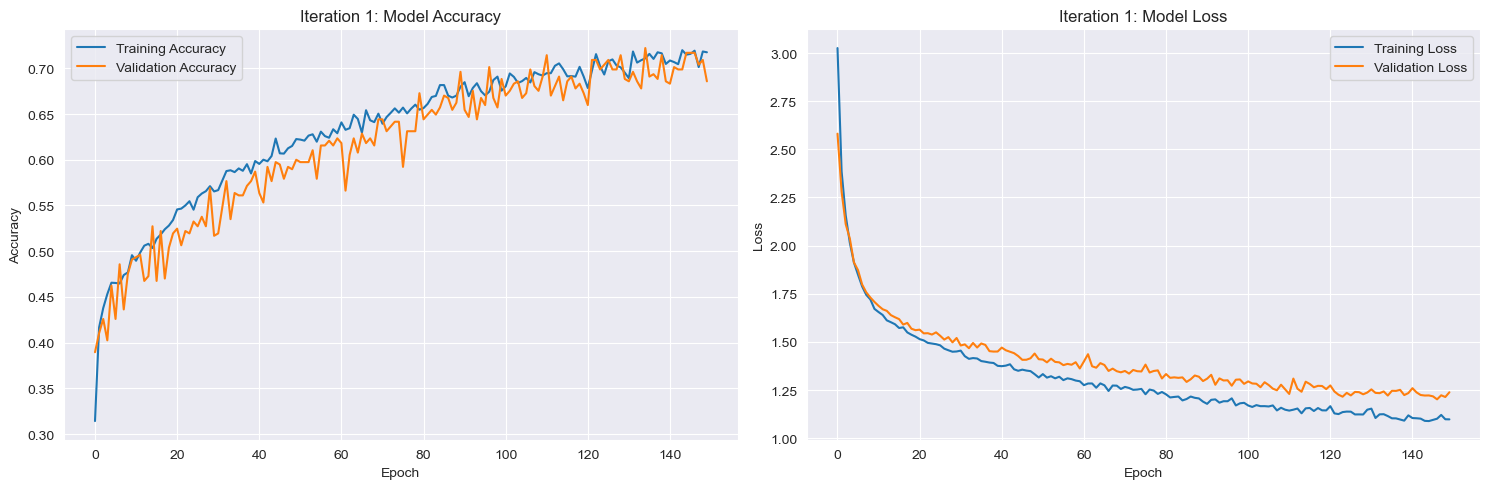


Final metrics for iteration 1:
Training Accuracy: 0.7175
Validation Accuracy: 0.6857
Training Loss: 1.0977
Validation Loss: 1.2384
Best Validation Accuracy: 0.7221

Iteration 2/3
Epoch 1/150


C:\Users\mihai\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



109/109 - 2s - 21ms/step - accuracy: 0.2831 - loss: 3.0663 - val_accuracy: 0.4156 - val_loss: 2.4712
Epoch 2/150
109/109 - 0s - 2ms/step - accuracy: 0.4115 - loss: 2.3695 - val_accuracy: 0.4312 - val_loss: 2.1615
Epoch 3/150
109/109 - 0s - 2ms/step - accuracy: 0.4294 - loss: 2.1418 - val_accuracy: 0.4701 - val_loss: 2.0018
Epoch 4/150
109/109 - 0s - 2ms/step - accuracy: 0.4465 - loss: 1.9922 - val_accuracy: 0.4675 - val_loss: 1.8864
Epoch 5/150
109/109 - 0s - 2ms/step - accuracy: 0.4555 - loss: 1.9049 - val_accuracy: 0.4831 - val_loss: 1.8239
Epoch 6/150
109/109 - 0s - 2ms/step - accuracy: 0.4575 - loss: 1.8329 - val_accuracy: 0.4675 - val_loss: 1.7554
Epoch 7/150
109/109 - 0s - 2ms/step - accuracy: 0.4751 - loss: 1.7803 - val_accuracy: 0.4753 - val_loss: 1.7168
Epoch 8/150
109/109 - 0s - 3ms/step - accuracy: 0.4728 - loss: 1.7372 - val_accuracy: 0.4831 - val_loss: 1.6935
Epoch 9/150
109/109 - 0s - 2ms/step - accuracy: 0.4896 - loss: 1.6996 - val_accuracy: 0.4883 - val_loss: 1.6583
Epo

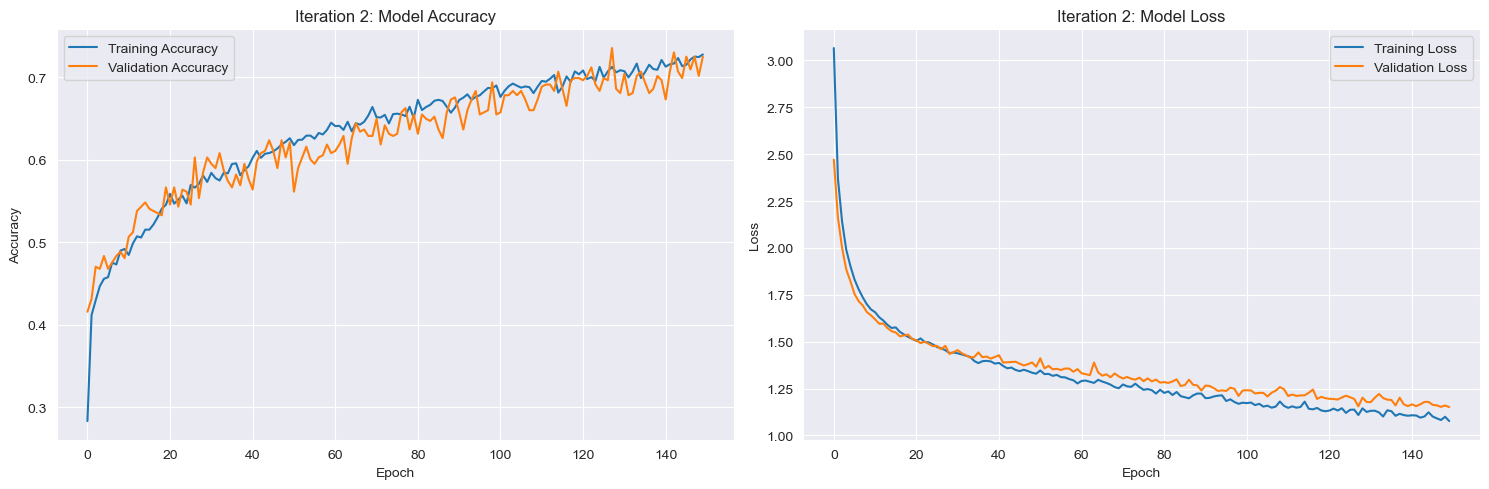


Final metrics for iteration 2:
Training Accuracy: 0.7273
Validation Accuracy: 0.7247
Training Loss: 1.0767
Validation Loss: 1.1515
Best Validation Accuracy: 0.7351

Iteration 3/3
Epoch 1/150


C:\Users\mihai\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



109/109 - 2s - 22ms/step - accuracy: 0.2776 - loss: 3.0485 - val_accuracy: 0.4182 - val_loss: 2.4453
Epoch 2/150
109/109 - 0s - 2ms/step - accuracy: 0.4101 - loss: 2.3749 - val_accuracy: 0.4623 - val_loss: 2.1018
Epoch 3/150
109/109 - 0s - 2ms/step - accuracy: 0.4416 - loss: 2.1434 - val_accuracy: 0.4727 - val_loss: 1.9572
Epoch 4/150
109/109 - 0s - 2ms/step - accuracy: 0.4488 - loss: 1.9951 - val_accuracy: 0.4571 - val_loss: 1.8651
Epoch 5/150
109/109 - 0s - 2ms/step - accuracy: 0.4598 - loss: 1.9068 - val_accuracy: 0.4571 - val_loss: 1.7883
Epoch 6/150
109/109 - 0s - 2ms/step - accuracy: 0.4659 - loss: 1.8390 - val_accuracy: 0.4727 - val_loss: 1.7463
Epoch 7/150
109/109 - 0s - 2ms/step - accuracy: 0.4792 - loss: 1.7808 - val_accuracy: 0.4675 - val_loss: 1.7124
Epoch 8/150
109/109 - 0s - 3ms/step - accuracy: 0.4740 - loss: 1.7402 - val_accuracy: 0.4623 - val_loss: 1.6680
Epoch 9/150
109/109 - 0s - 3ms/step - accuracy: 0.4905 - loss: 1.6994 - val_accuracy: 0.4935 - val_loss: 1.6510
Epo

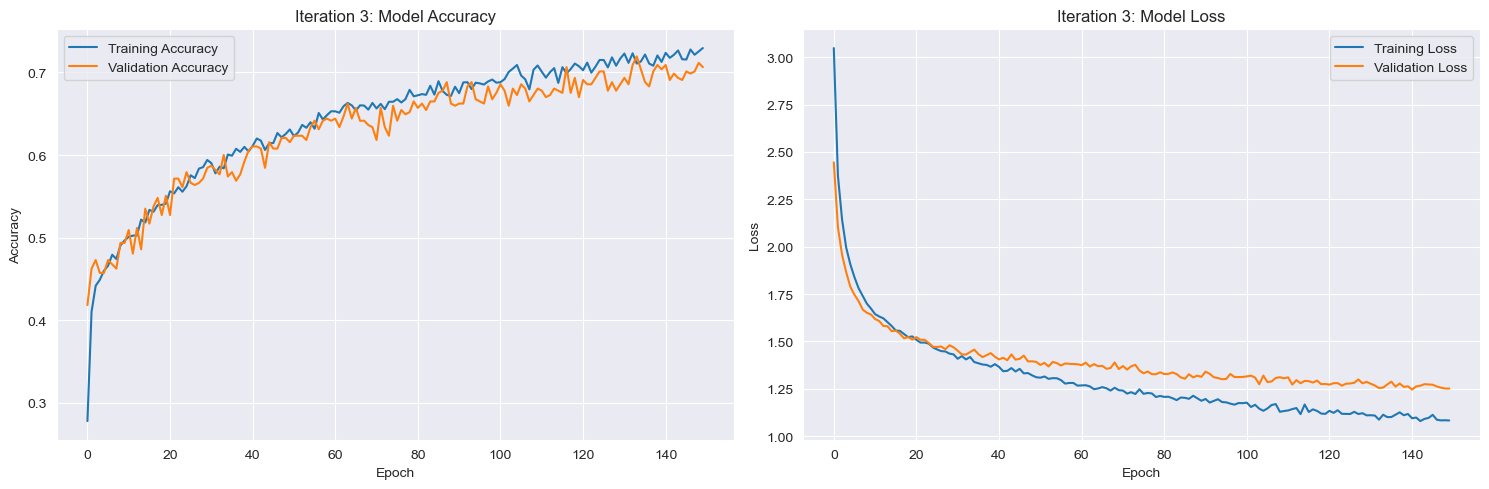


Final metrics for iteration 3:
Training Accuracy: 0.7296
Validation Accuracy: 0.7065
Training Loss: 1.0824
Validation Loss: 1.2511
Best Validation Accuracy: 0.7195

Overall training results:
Mean validation accuracy: 0.7255
Standard deviation: 0.0068


In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to create the model with L2 regularization
def create_model(input_dim, output_dim, l2_lambda=0.005):
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda), input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dropout(0.2),
        Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dense(output_dim, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def plot_training_history(history, iteration):
    """Plot training & validation accuracy and loss curves"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title(f'Iteration {iteration + 1}: Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Loss plot
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title(f'Iteration {iteration + 1}: Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print final metrics
    print(f"\nFinal metrics for iteration {iteration + 1}:")
    print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Training Loss: {history.history['loss'][-1]:.4f}")
    print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")

def train_and_evaluate_model(X, y, n_iterations=3):
    # Convert the target variables to numerical format
    race_columns = [col for col in y.columns if col.startswith('Race_')]
    y_encoded = y[race_columns].values
    
    # Initialize StandardScaler
    scaler = StandardScaler()
    
    # Initialize lists to store results
    val_accuracies = []
    best_model = None
    best_val_accuracy = 0
    
    # Perform multiple training iterations
    for iteration in range(n_iterations):
        print(f"\nIteration {iteration + 1}/{n_iterations}")
        
        # Split data - 90% training, 10% validation
        X_train, X_val, y_train, y_val = train_test_split(
            X, y_encoded, 
            test_size=0.1, 
            random_state=42 + iteration  # Different random state for each iteration
        )
        
        # Scale features
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        # Create and train model
        model = create_model(X_train.shape[1], y_encoded.shape[1])
        
        history = model.fit(
            X_train_scaled, y_train,
            epochs=150,
            batch_size=32,
            validation_data=(X_val_scaled, y_val),
            verbose=2
        )
        
        # Plot training history
        plot_training_history(history, iteration)
        
        # Evaluate model
        val_accuracy = max(history.history['val_accuracy'])
        val_accuracies.append(val_accuracy)
        
        print(f"Best Validation Accuracy: {val_accuracy:.4f}")
        
        # Save best model
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = tf.keras.models.clone_model(model)
            best_model.set_weights(model.get_weights())
    
    print("\nOverall training results:")
    print(f"Mean validation accuracy: {np.mean(val_accuracies):.4f}")
    print(f"Standard deviation: {np.std(val_accuracies):.4f}")
    
    return best_model, val_accuracies

# Prepare the data
def prepare_data(data):
    # Separate features and target
    race_columns = [col for col in data.columns if col.startswith('Race_')]
    X = data.drop(columns=race_columns)
    y = data[race_columns]
    
    return X, y

# Main execution
def main(data):
    # Prepare data
    X, y = prepare_data(data)
    
    # Train and evaluate model
    best_model, accuracies = train_and_evaluate_model(X, y)
    
    return best_model, accuracies

# Example usage
print(df.value_counts())
print(df.info())
    
best_model, accuracies = main(df)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

=== Model Evaluation on Test Data ===

Overall Test Accuracy: 0.6838

Classification Report:
                  precision    recall  f1-score   support

          Bengal       0.75      0.72      0.73        50
          Birman       0.63      0.57      0.60        30
BritishShorthair       0.74      0.83      0.78        30
       Chartreux       1.00      0.33      0.50         6
        European       0.40      0.55      0.47        80
       MaineCoon       0.67      0.86      0.75        35
         NoBreed       0.49      0.35      0.41        60
           Other       0.92      0.77      0.84        30
         Persian       1.00      1.00      1.00        30
         Ragdoll       1.00      1.00      1.00        40
        Savannah       1.00      0.60      0.75         5
         Siamese       1.00      0.40      0.57        10
          Sphynx       1.00      1.00      1.00        15
   TurkishAngora       1.00      0.33      0.50       

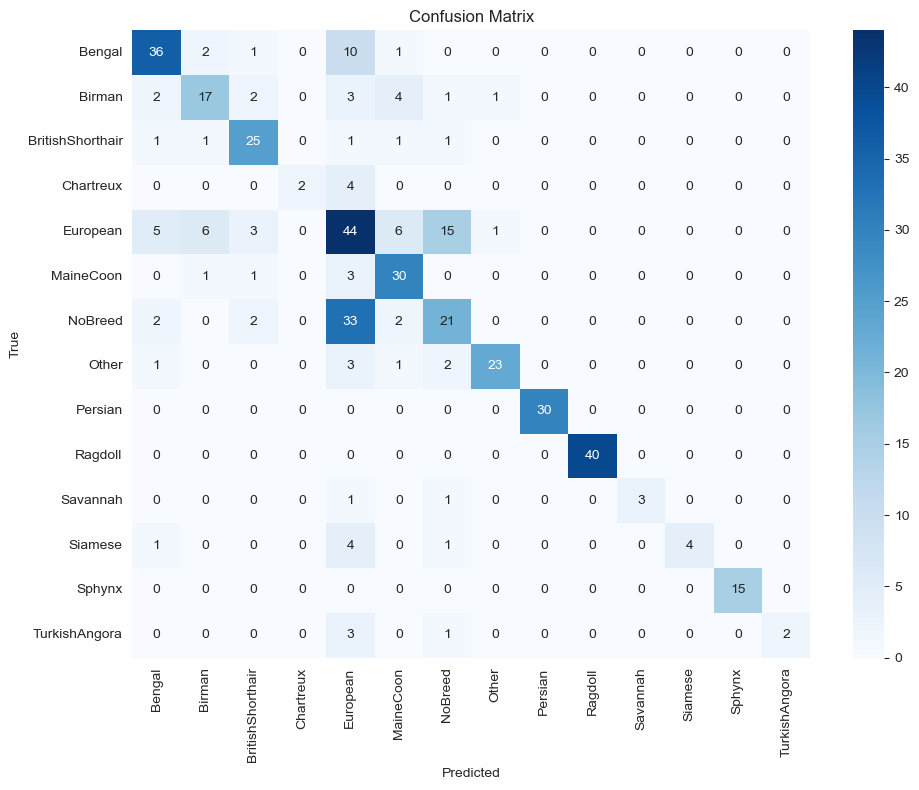

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def test_model(best_model, test_df):
    """
    Test the trained model on a new test dataset.
    
    Parameters:
    best_model: trained Keras model
    test_df: pandas DataFrame containing test data
    
    Returns:
    dict containing test accuracy, predictions, and evaluation metrics
    """
    # Prepare test data
    race_columns = [col for col in test_df.columns if col.startswith('Race_')]
    X_test = test_df.drop(columns=race_columns)
    y_test = test_df[race_columns]
    
    # Scale features using the same approach as training
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)
    
    # Make predictions
    y_pred_proba = best_model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_classes = np.argmax(y_test.values, axis=1)
    
    # Calculate accuracy
    test_accuracy = np.mean(y_pred == y_test_classes)
    
    # Generate classification report
    class_names = [col.replace('Race_', '') for col in race_columns]
    report = classification_report(y_test_classes, y_pred, target_names=class_names)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    
    # Calculate per-class metrics
    per_class_metrics = {}
    for i, class_name in enumerate(class_names):
        true_class = (y_test_classes == i)
        pred_class = (y_pred == i)
        
        true_positives = np.sum(true_class & pred_class)
        false_positives = np.sum(~true_class & pred_class)
        false_negatives = np.sum(true_class & ~pred_class)
        
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        per_class_metrics[class_name] = {
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
    
    return {
        'test_accuracy': test_accuracy,
        'classification_report': report,
        'confusion_matrix': cm,
        'per_class_metrics': per_class_metrics,
        'predictions': y_pred,
        'prediction_probabilities': y_pred_proba
    }

# Example usage
def evaluate_test_results(test_df, best_model):
    """
    Evaluate and print test results in a readable format.
    """
    results = test_model(best_model, test_df)
    
    print("\n=== Model Evaluation on Test Data ===")
    print(f"\nOverall Test Accuracy: {results['test_accuracy']:.4f}")
    
    print("\nClassification Report:")
    print(results['classification_report'])
    
    print("\nPer-Class Metrics:")
    for class_name, metrics in results['per_class_metrics'].items():
        print(f"\n{class_name}:")
        for metric_name, value in metrics.items():
            print(f"  {metric_name}: {value:.4f}")
    
    return results

# To use the testing script:
results = evaluate_test_results(test_df, best_model)